<a href="https://colab.research.google.com/github/rselent/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/1_1_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

In [0]:
# I like the contrast of the green text, compared to the rest of the black-on-white text blocks,
# So all of my "answers" -- comments, explanations, and insights and such -- will usually occur in comment blocks
# Unless specifically prompted to use a textblock by a question

# That said, let the fun begin!

import pandas as pd

In [42]:
# Import dataset

firesDataUrl = "http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"

fires = pd.read_csv( firesDataUrl)

fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [43]:
fires.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [44]:
# Headers are showing up without issue, and first and last 5 seem to be in fine form and working order.

# One _could_ deduce from the above .head() and .tail() results that the dataset
# Does indeed have the correct number of rows (0 -> 516 = 517) and columns --
# per the UCI repo description -- but since we're learning how to use Python
# And how to manipulate data and datasets here, the appropriate way to 
# Check this would be to use .shape, and... 

fires.shape

(517, 13)

In [0]:
# ...correct shape confirmed.

In [45]:
# UCI lists this dataset as having "N/A" missing values. This both bothers and worries me, lol.
# Would a "yes" or "no" answer be insufficient or incorrect? What warranted an "N/A" to a binary question??
# What secrets are they trying to (ethically?) hide??
# So, to appease both curiosity and thoroughness, we'll have to inspect each column
# To make sure all are both within expected norms (months, days of week), and, at the very least, numeric values where expected.

# First we're going to check .describe(), just for a broad look and to see if maybe something jumps out at us.
# (NaN values _should_ show up as min or max values, right? If NaN entries are not counted -- if they're skipped over -- 
# The column count would not be the uniform 517 in this case.... right? lol)

fires.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [46]:
# Everything seems good in .describe() results, so now we just need to check the two cols with object entries

# Instead of constructing a loop that iterates through all entries and verifies an object against the known months/days of the week,
# We can just inspect a column using .value_counts(). We should see 12 values for the "month" column, and 7 values for the "day" column.

# Print statements so we can see both
print( fires[ "month"].value_counts(), "\n" )
print( fires[ "day"].value_counts() )

# Statistically, in 500+ entries we should have _at least_ 1 of every 12 or 7 possible values, respectively, and
# That's exactly what we see... barely... lol (poor November, never getting any fires).
# But what we're really looking for is that none of the months or days of the week seem odd -- no " ?"s or " pqr"s.
# And again, that's exactly what we get. Everything looks good for further analysis and story time.

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
jan      2
may      2
nov      1
Name: month, dtype: int64 

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64


## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed



In [51]:
#from google.colab import files
#redRedWine = files.upload()

# The above method is throwing an error for me, even though syntax is fine:
# MessageError: TypeError: Cannot read property '_uploadFiles' of undefined
# 
# Seems to be a third-party cookie issue, according to StackOverflow? 
# Still investigating...
# Using files tab instead (womp womp..)

df = pd.read_csv( "winequality-red.csv")

df.describe()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
count,1599
unique,1359
top,7.2;0.36;0.46;2.1;0.074;24;44;0.99534;3.4;0.85...
freq,4


This warrants a text box...

No.

No's everywhere. To all questions.

All data, including headers, was separated by semicolons instead of commas. Semicolons. D:

In [56]:
# So, instead of flipping tables or crying, we need to change the separator when reading the csv file

wine = pd.read_csv( "winequality-red.csv", sep= ";")

# wine.shape                                        # Executed, results curious, expanding:

wine.describe()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [57]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [58]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [0]:
# At first glance, the ~1600 entries could seem like there are A LOT of missing values,
# But there are two datasets (red, white) that add up to the 4,898 delineated on the UCI repo site.
# The other 3,299 should exist in the white dataset. Should.

# That aside, everything looks good now that we told pandas what separator to look for.

## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [61]:
# Fire Dataset here

pd.crosstab( fires[ "month"], fires[ "day"])

day,fri,mon,sat,sun,thu,tue,wed
month,,,,,,,
apr,1,1,1,3,2,0,1
aug,21,15,29,40,26,28,25
dec,1,4,0,1,1,1,1
feb,5,3,4,4,1,2,1
jan,0,0,1,1,0,0,0
jul,3,4,8,5,3,6,3
jun,3,3,2,4,2,0,3
mar,11,12,10,7,5,5,4
may,1,0,1,0,0,0,0


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

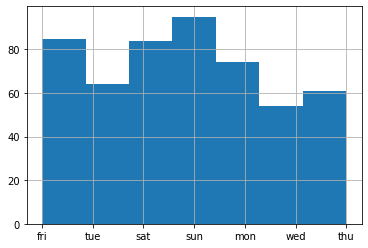

In [65]:
# Histogram: Safest day for fires? Not in order

fires[ "day"].hist( bins= 7);

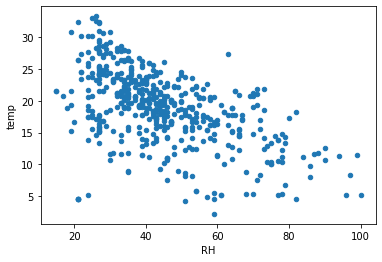

In [66]:
# Scatterplot: Relative humidity vs ambient temp when fire occurred

fires.plot.scatter( "RH", "temp");

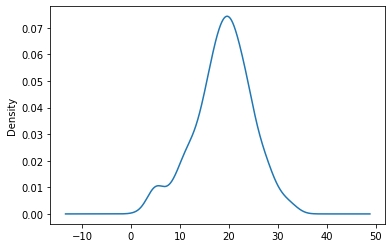

In [76]:
# Is it a density or destiny plot? 

fires[ "temp"].plot.kde();

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


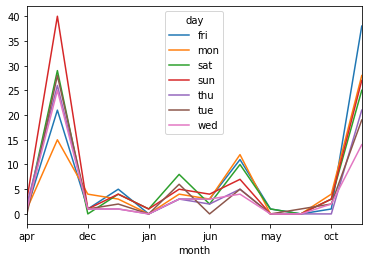

In [82]:
# Your Code Here

pd.crosstab( fires[ "month"], fires[ "day"]).plot();

# It doesn't matter which style is used, there's just too many days of the week to make this readable

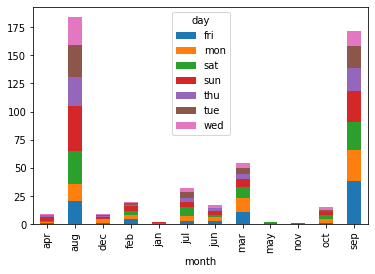

In [84]:
pd.crosstab( fires[ "month"], fires[ "day"]).plot( kind= "bar", stacked= True);

# So, even with a stacked bar graph... it's interesting. It's more readible than the line graph above, 
# But still not readible to the point that I'd like, personally. Although, I guess it depends on what
# Kind of story you were looking to tell with this data.

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.